In [71]:
from llama_index.core import Settings
from llama_index.llms.ollama import Ollama
from llama_index.experimental.query_engine.pandas.pandas_query_engine import PandasQueryEngine
import pandas as pd

In [72]:
df = pd.read_csv("vendas.csv")

In [73]:
df.head()

,ID_compra,filial,cidade,tipo_cliente,genero,tipo_produto,preco_unitario,quantidade,imposto_5%,total,data,hora,forma_pagamento,avaliacao
0,750-67-8428,A,Santo André,Membro,Feminino,Saúde e Beleza,74.69,7,26.1415,548.9715,2024-01-05,13:08:00,Carteira Digital,9.1
1,226-31-3081,C,São Caetano,Normal,Feminino,Eletrônicos,15.28,5,3.8200,80.2200,2024-03-08,10:29:00,Dinheiro,9.6
2,631-41-3108,A,Santo André,Normal,Masculino,Casa,46.33,7,16.2155,340.5255,2024-03-03,13:23:00,Cartão de Crédito,7.4
3,123-19-1176,A,Santo André,Membro,Masculino,Saúde e Beleza,58.22,8,23.2880,489.0480,2024-01-27,20:33:00,Carteira Digital,8.4
4,373-73-7910,A,Santo André,Normal,Masculino,Esportes e Viagem,86.31,7,30.2085,634.3785,2024-02-08,10:37:00,Carteira Digital,5.3


In [74]:

ollama_llm = Ollama(
    model="llama3.2:3b", 
    request_timeout=120.0, 
    context_window=10240, 
    temperature=0.05, # It scaling the logits before they are turned into probabilities (passed to the softmax function)
    max_tokens=10240,
    top_k=5, # It force the mode select the top k tokens with the highest probability
    # top_p=0.99, # It instruct the model to select from the top p percent of tokens
    # frequency_penalty=0.5, # It penalizes the model for using the same token multiple times in a single response
    # presence_penalty=0.5, # It penalizes the model for using the same token multip
    #repeat_penalty=0.5, # It penalizes the model for using the same token multiple times in a single response
)

Settings.llm = ollama_llm


In [75]:
query_engine = PandasQueryEngine(df=df, verbose=True)

In [76]:
perguntas = [
    {
        "pergunta": "Qual é a forma de pagamento mais utilizada pelos clientes?", 
        "resposta_esperada": "Carteira Digital"
    },
    {
        "pergunta": "Qual é o tipo de produto com maior quantidade por filial?", 
        "resposta_esperada": "(A, Casa), (B, Esportes e Viagem), (C, Alimentos e Bebidas)"
    },
    {
        "pergunta": "Qual é a forma de pagamento mais utilizada pelos clientes em cada filial?", 
        "resposta_esperada": "(A, Carteira Digital), (B, Carteira Digital), (C, Dinheiro)"
    },
    {
        "pergunta": "Em quais cidades temos filiais?", 
        "resposta_esperada": "['Santo André' 'São Caetano' 'São Bernardo do Campo']"
    },
    {
        "pergunta": "Qual é o preço unitário médio de cada tipo de produto?",
        "resposta_esperada": """
            (Alimentos e Bebidas, 56.008851), 
            (Casa, 55.316937), 
            (Eletrônicos, 53.551588), 
            (Esportes e Viagem, 56.993253),
            (Moda, 57.153652),
            (Saúde e Beleza 54.854474)
        """
    },
    {
        "pergunta": "Qual é a média de valor de compra por tipo de cliente?",
        "resposta_esperada": """
            (Membro 327.791305),
            (Normal 318.122856)

        """
    },
    {
        "pergunta": "Qual é a filial com maior faturamento?",
        "resposta_esperada": "C"
    },
    {
        "pergunta": "Qual é a avaliação média por filial?",
        "resposta_esperada": """"
            (A, 7.027059),
            (B, 6.818072),
            (C, 7.072866)
        """
    },
    
]

In [77]:
for pergunta in perguntas:
    print(f'Pergunta: {pergunta["pergunta"]}')
    print(f'Resposta Esperada: {pergunta["resposta_esperada"]}')
    resposta = query_engine.query(pergunta["pergunta"])
    print(f'Resposta: {resposta.response}')
    print('---')
    print('---')
    print('---')

Pergunta: Qual é a forma de pagamento mais utilizada pelos clientes?
Resposta Esperada: Carteira Digital
INFO:httpx:HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"
HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"
> Pandas Instructions:
```
`df['forma_pagamento'].value_counts().index[0]`
```
> Pandas Output: Carteira Digital
Resposta: Carteira Digital
---
---
---
Pergunta: Qual é o tipo de produto com maior quantidade por filial?
Resposta Esperada: (A, Casa), (B, Esportes e Viagem), (C, Alimentos e Bebidas)
INFO:httpx:HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"
HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"
> Pandas Instructions:
```
`df.loc[df.groupby('filial')['quantidade'].idxmax()][['filial', 'tipo_produto']]`
```
> Pandas Output:    filial         tipo_produto
13      A  Alimentos e Bebidas
96      B       Saúde e Beleza
7       C                 Casa
Resposta:    filial         tipo_produto
13 

INFO:httpx:HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"
HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"
> Pandas Instructions:
```
df['avaliacao'].value_counts().plot(kind='bar')
```
> Pandas Output: Axes(0.125,0.11;0.775x0.77)


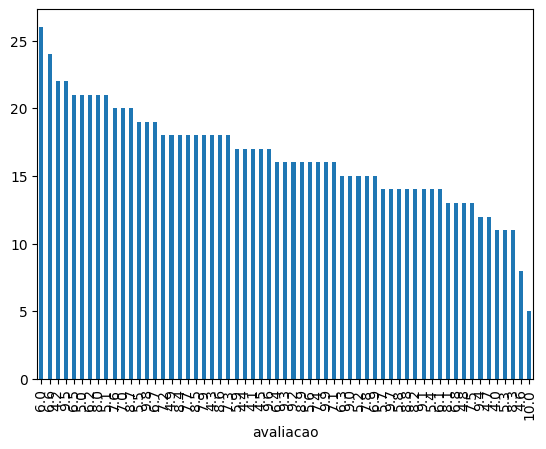

In [78]:
response = query_engine.query('Você pode plotar a distribuição das avaliações?')

In [79]:
str(response.response)

'Axes(0.125,0.11;0.775x0.77)'

In [80]:
# df.avaliacao.plot(kind='hist')